#### 非线性SVM分类

**生成二分类仿真数据**

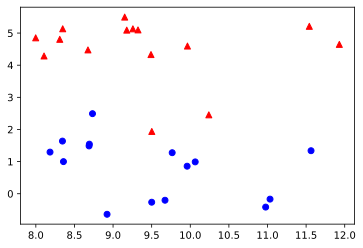

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=2, random_state=4, n_samples=30)
id0 = np.where(y==0); id1 = np.where(y==1)

eps = 0.5
x_min,x_max = X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max = X[:,1].min()-eps, X[:,1].max()+eps

plt.plot(X[id0,0],X[id0,1],'bo')
plt.plot(X[id1,0],X[id1,1],'r^')

plt.show()

**SVC(kernel, C, gamma, max_iter)**

    功能：学习线性SVM分类器
    方法：
        C：算法超参数
        max_iter：算法最大迭代次数
        kernel：核函数，'linear','poly','rbf','sigmoid'
        gamma：对应rbf核函数
        degree：对应poly核函数
        
**RBF核函数**

$$ \kappa(\mathbf{x}_1,\mathbf{x}_2) = \exp\left(-\gamma\|\mathbf{x}_1-\mathbf{x}_2\|^2\right) $$

In [10]:
from sklearn.svm import SVC

SVM_Linear = SVC(kernel='linear', C=100).fit(X, y)
SVM_Kernel = SVC(kernel='rbf', C=100, gamma=0.1).fit(X, y)

print(chr(945),"of support vectors:\n", SVM_Kernel.dual_coef_)
print("\nID of support vectors:\n", SVM_Kernel.support_)
print("\nSupport Vectors:\n", SVM_Kernel.support_vectors_)

α of support vectors:
 [[-44.72002493 -62.70503584  -6.62050546  14.04556623 100.        ]]

ID of support vectors:
 [ 0 21 29  7 27]

Support Vectors:
 [[ 9.76566918  1.27689813]
 [ 8.7337095   2.49162431]
 [11.563957    1.3389402 ]
 [ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]]


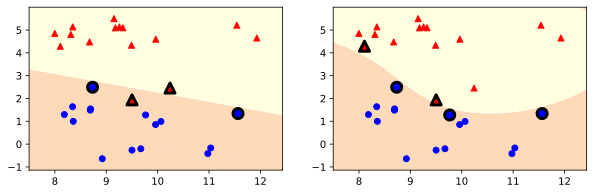

In [13]:
from plot_decision_boundary import plot_decision_boundary

fig, axes = plt.subplots(1,2,figsize=(10, 3))
for SVM, ax in zip([SVM_Linear,SVM_Kernel],axes):
    ax.plot(X[id0,0],X[id0,1],'bo')
    ax.plot(X[id1,0],X[id1,1],'r^')

    id = np.where(SVM.dual_coef_[0]<0)
    id_support = SVM.support_[id]
    ax.plot(X[id_support,0],X[id_support,1],'bo',markeredgecolor='black',markeredgewidth=3,markersize=10)
    
    id = np.where(SVM.dual_coef_[0]>0)
    id_support = SVM.support_[id]
    ax.plot(X[id_support,0],X[id_support,1],'r^',markeredgecolor='black',markeredgewidth=3,markersize=10)

    plot_decision_boundary(SVM,axis=[x_min,x_max,y_min,y_max],ax=ax)

#axes[0].set_title('Linear SVM')
#axes[1].set_title('Nolinear SVM')

plt.show()